Seu atual diretório é C:\Users\Adm\Desktop\Support_Exercise_M14\input

Os arquivos para os gráficos são: 
SINASC_RO_2019_ABR.csv
SINASC_RO_2019_AGO.csv
SINASC_RO_2019_FEV.csv
SINASC_RO_2019_JAN.csv
SINASC_RO_2019_JUL.csv
SINASC_RO_2019_JUN.csv
SINASC_RO_2019_MAI.csv
SINASC_RO_2019_MAR.csv
SINASC_RO_2019_NOV.csv
SINASC_RO_2019_OUT.csv

Meses que não foram encontrados nos arquivos:
False    Setembro
False    Dezembro
dtype: object

Seu atual diretório é ./Suport_Exercise_M14/imagens

Diretório MAR_Gráficos foi criado.
Diretório ABR_Gráficos foi criado.
Diretório MAI_Gráficos foi criado.
Diretório JUN_Gráficos foi criado.
Diretório DEZ_Gráficos foi criado.


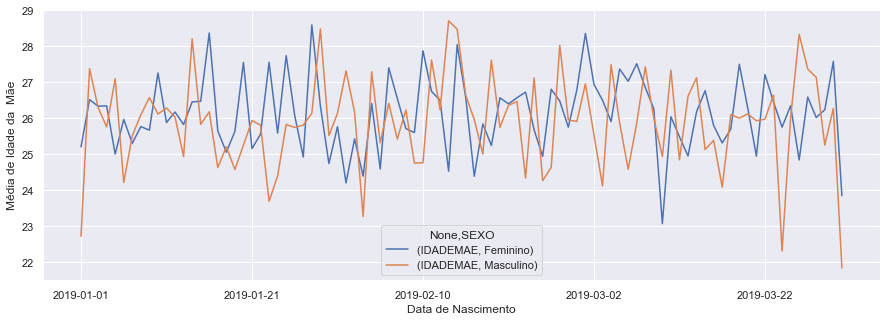

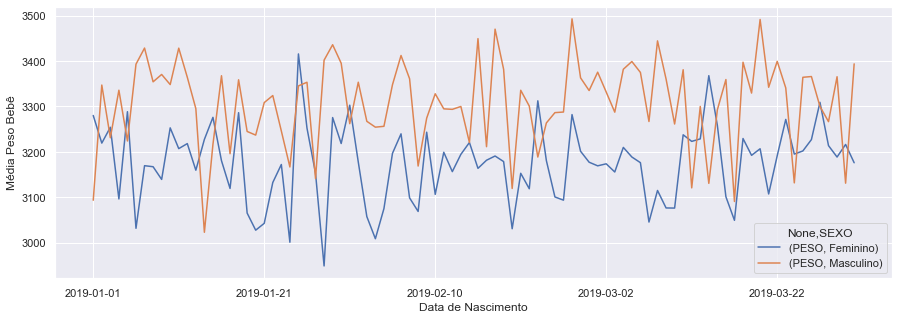

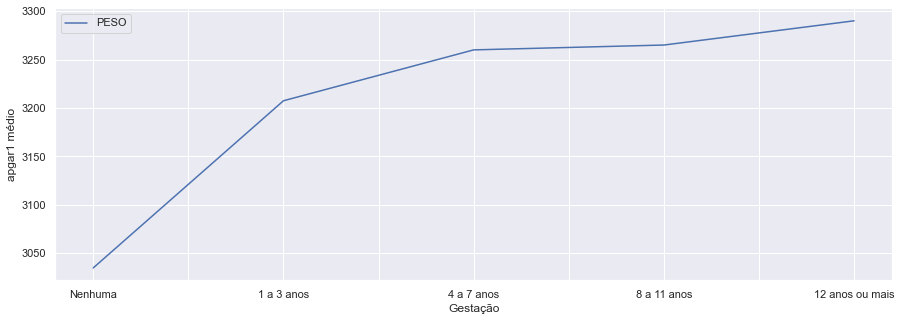

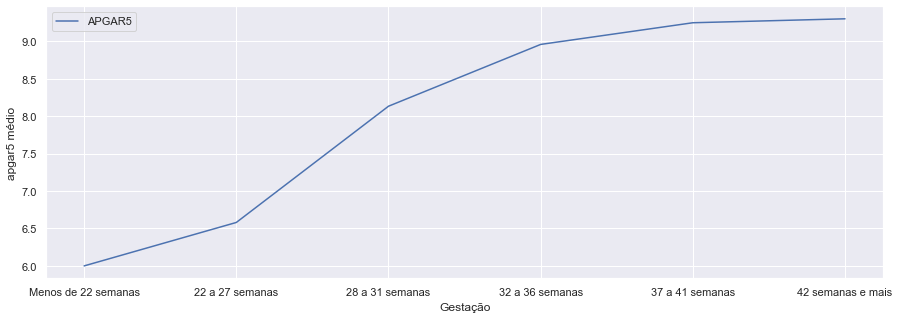

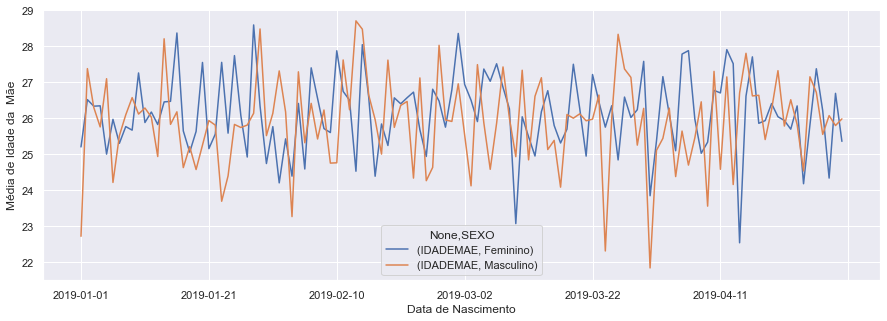

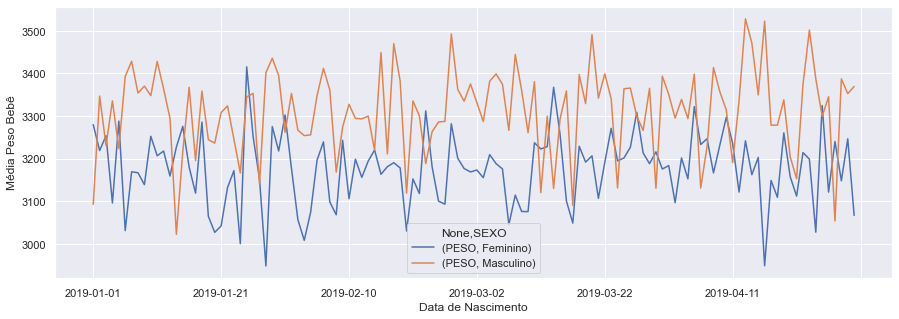

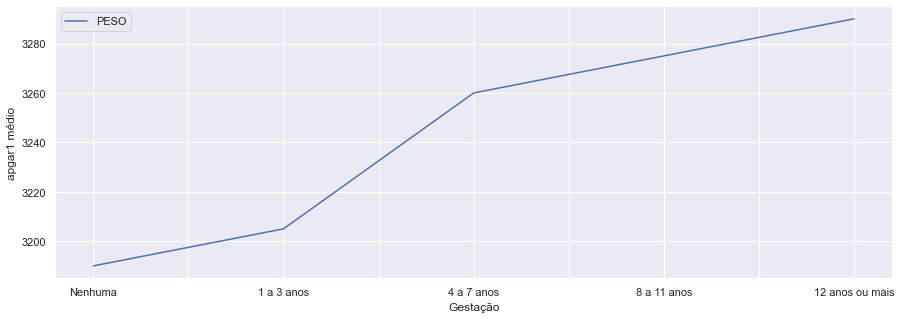

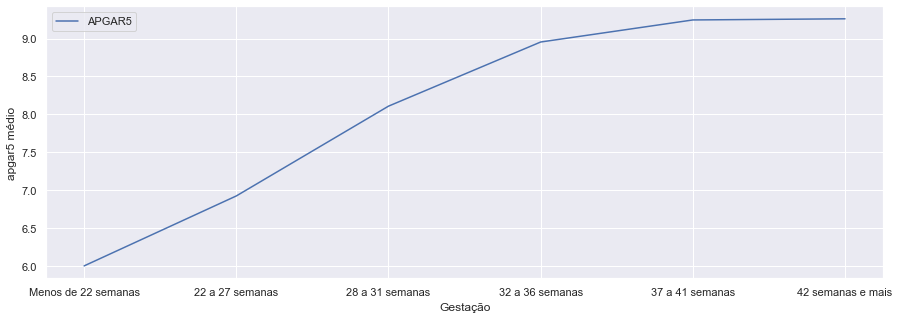

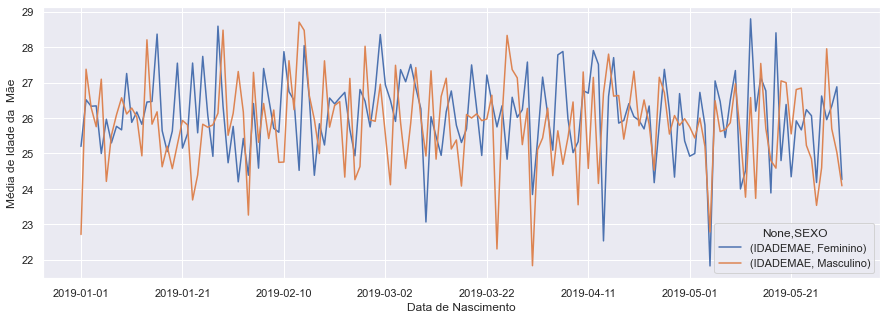

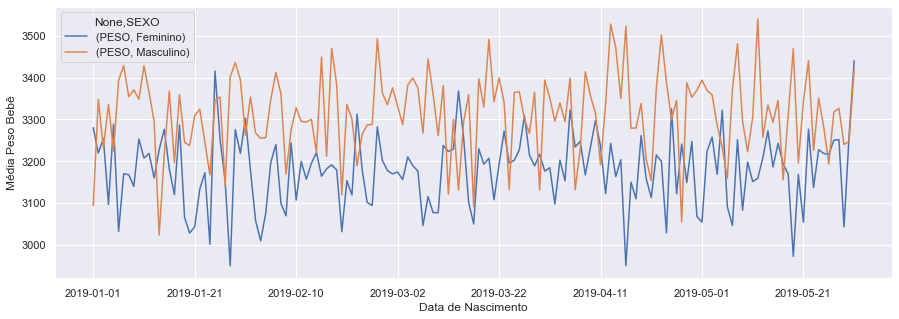

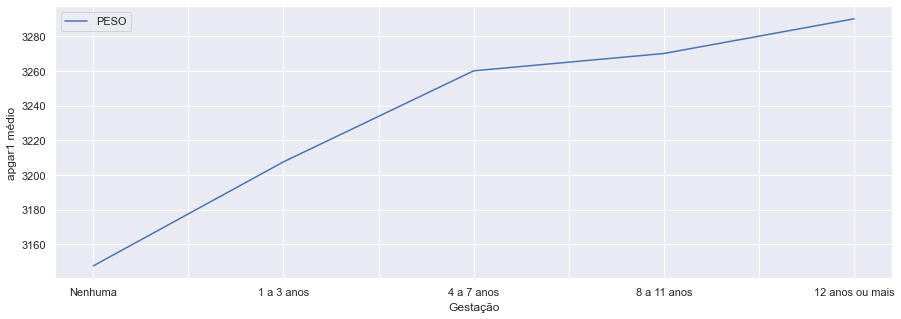

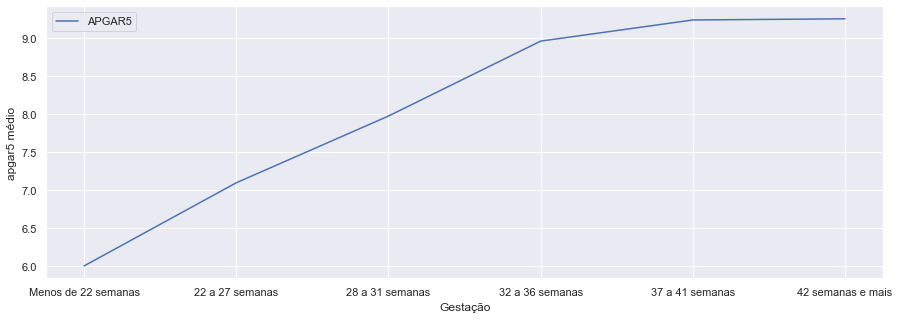

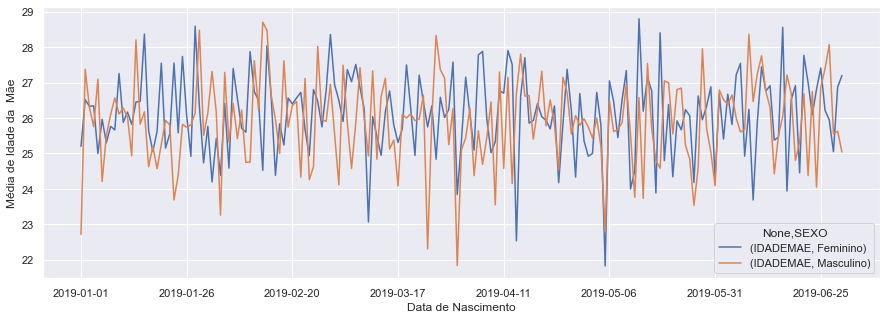

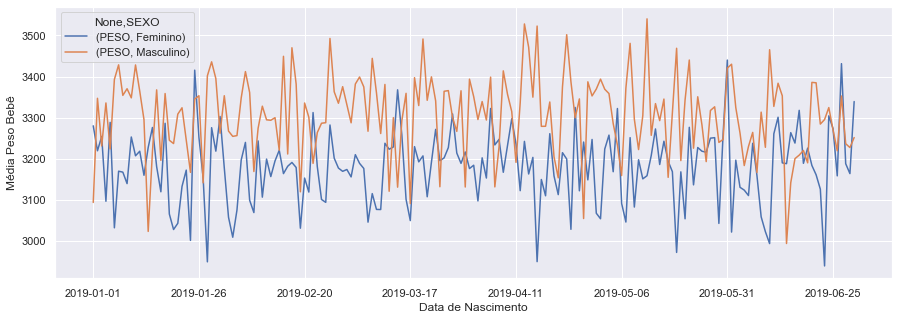

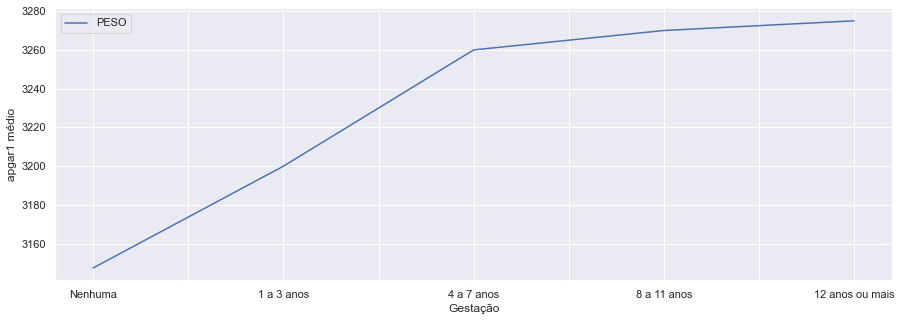

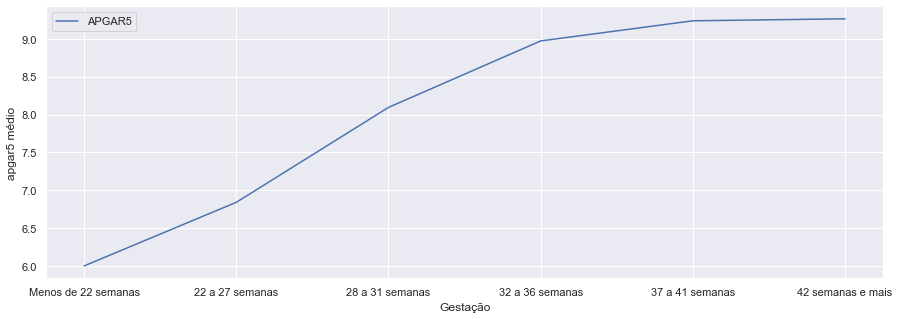

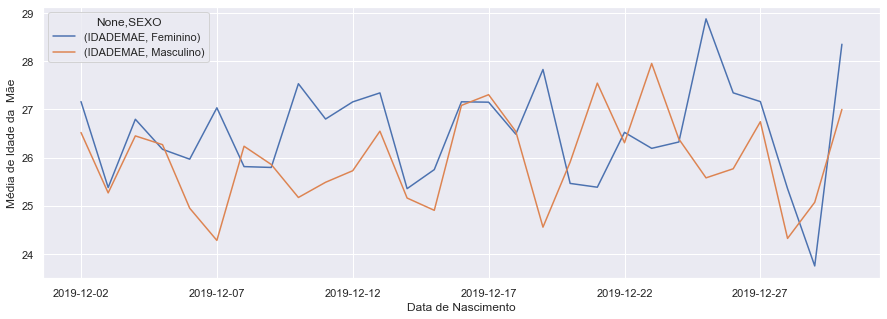

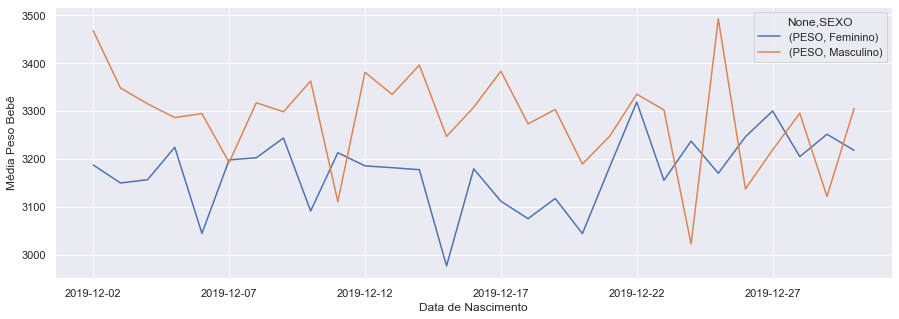

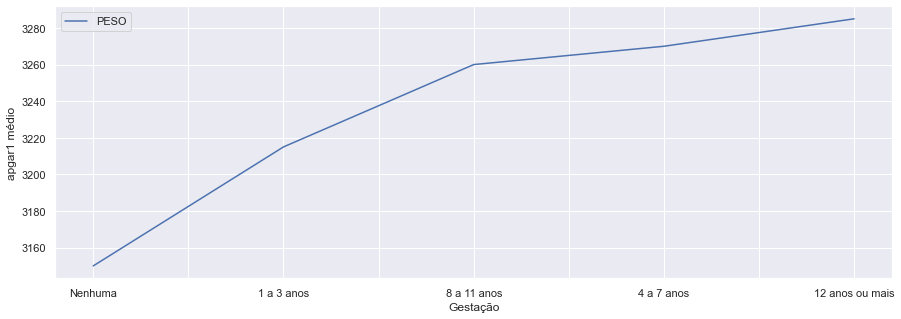

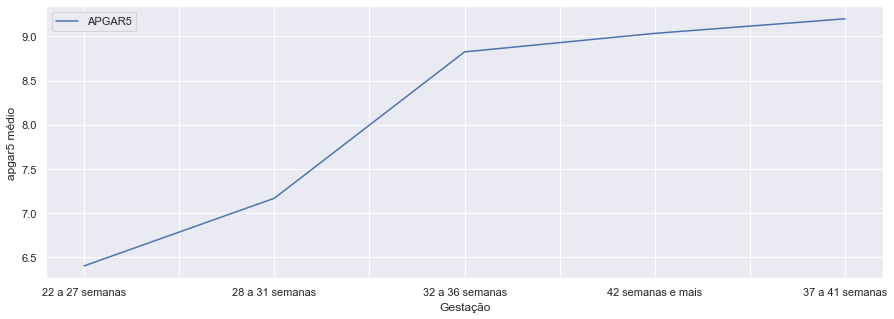

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()

##############################
ano = "2019"#PREENCHER O ANO QUE QUEREMOS
meses_ = "Março,Abril,Maio,Junho,Dezembro" #PREENCHER COM OS MESES QUE QUEREMOS
###############################

path_dados = r'C:\Users\Adm\Desktop\Support_Exercise_M14\input'
os.chdir(path_dados) #Mudando para o diretório com os dados q/ serão usados.

print("Seu atual diretório é",os.getcwd())

data_files = np.array(os.listdir(path_dados)) #Lista de arquivos dentro deste diretório.

todos_meses = np.array(['Janeiro','Fevereiro','Março','Abril','Maio','Junho',
                       'Julho','Agosto','Setembro','Outubro','Novembro','Dezembro'])

def files_para_uso(lista_de_arquivos, _ano:str):
    """Exclusivo para arquivos SINASC_XX_{ANO}_{MÊS}
    * Retorna o(s) arquivo(s) de um ano e mes(es) específicos.
    MÊS: três caracteres em upper case.
    lista_de_arquivos: nomes dos arquivos extraídos de um diretório"""
    
    meses = [mes[:3].upper() for mes in todos_meses] #Padrão dos meses escritos nos files (ex:FEV)
    
    tem_ano_arquivo = np.array([_ano in nome_arquivo for nome_arquivo in lista_de_arquivos]) #Boolean
    
    if tem_ano_arquivo.sum() > 0:
        files_p_uso = []
        for i in range(len(lista_de_arquivos)-1):
            if tem_ano_arquivo[i] == True:
                #Verificar qual o mês do arquivo
                for ind in range(len(meses)-1):
                    if meses[ind] in lista_de_arquivos[tem_ano_arquivo][i]:
                        files_p_uso.append(lista_de_arquivos[tem_ano_arquivo][i])
                    else:
                        continue
        return np.array(files_p_uso)
    else:
        return f"O Arquivo não compreende {_ano} no nome ou não existe files deste ano."

files = files_para_uso(data_files, ano)

print()

print("Os arquivos para os gráficos são: ")
[print(file) for file in files];    

#Indexar os meses escitos comuns com o dos meses escritos nos arquivos
idx_meses = [] #Para a coleção todos_meses, True p/ meses que constam nos arquivos

count_falses = 0
for mes in todos_meses:
    for file in files:
        if mes[:3].upper() in file:
            idx_meses.append(True)
        elif (mes[:3].upper() in file) == False:
            count_falses += 1
    if count_falses == 10:
        idx_meses.append(False)
    count_falses = 0

series_meses = pd.Series(todos_meses.copy())
series_meses.index = idx_meses

print()
print("Meses que não foram encontrados nos arquivos:")
print(series_meses[False])
print()

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

def quatro_graficos(df,nome_dir): #pedido_meses[i][:3].upper()
    path = 'C:/Users/Adm/Desktop/Support_Exercise_M14'
    plota_pivot_table(df,'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', #Primeiro
                      'Média de Idade da  Mãe','Data de Nascimento','unstack');
    plt.savefig(path+'/imagens/'+nome_dir+'/media-idade-mãe-por-sexo.png')
    plota_pivot_table(df,'PESO', ['DTNASC', 'SEXO'], 'mean','Média Peso Bebê', #Segundo
                      'Data de Nascimento','unstack');
    plt.savefig(path+'/imagens/'+nome_dir+'/media-peso-bebe-por-sexo.png')
    plota_pivot_table(df,'PESO', 'ESCMAE', 'median', 'apgar1 médio','Gestação','sort');#Terceiro
    plt.savefig(path+'/imagens/'+nome_dir+'/media-apgar1-por-escolaridade-mae.png')
    plota_pivot_table(df, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 médio','Gestação','sort');#Quarto
    plt.savefig(path+'/imagens/'+nome_dir+'/media-apgar5-por-gestacao.png')
    return None

pedido_meses = meses_.split(sep=',')

#Mudando p/ pasta onde serão criados os diretórios p/ cada mês
os.chdir(r'C:\Users\Adm\Desktop\Support_Exercise_M14\imagens')
print("Seu atual diretório é ./Suport_Exercise_M14/imagens")
print()

sign = np.array(range(1,13)).astype(str) #p/ filtro em elif
sign[:9] = ['0' + x for x in sign[:9]] #p/ filtro em elif
dicio_mes_num = dict(zip(todos_meses, sign))  #Pedido_meses deve estar escrito igual todos_meses

for i in range(len(pedido_meses)):
    if pedido_meses[i] in list(series_meses[idx_meses]):
        qual_e_o_arq = list(map(lambda file: pedido_meses[i][:3].upper() in file, files))
        arq = files[qual_e_o_arq][0] #Conseguimos o arquivo csv

        #Abrir o arq no df
        df = pd.read_csv("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\input\\"+arq)

        #Criar diretório
        dir_mensal = pedido_meses[i][:3].upper()+'_Gráficos'
        os.makedirs("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\imagens\\"+dir_mensal, exist_ok=True)
        os.chdir("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\imagens\\"+dir_mensal)

        #Extrair os gráficos
        quatro_graficos(df, dir_mensal)
        
        print("Diretório "+dir_mensal+" foi criado.")
        os.chdir("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\imagens")

    elif pedido_meses[i] not in list(series_meses[idx_meses]):
        #Abrir o arquivo completo e filtrar as datas de nascimento de acordo com mês pedido
        #Abrir o arq no df
        df = pd.read_csv("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\input\\SINASC_RO_2019.csv")

        #Filtrar dados de nascimento do mês que pedimos
        _mes = dicio_mes_num[pedido_meses[i]]
        df = df.loc[(df['DTNASC'] < f'{ano}-{_mes}-31') & (df['DTNASC'] > f'{ano}-{_mes}-01')]

        #Criar diretório
        dir_mensal = pedido_meses[i][:3].upper()+'_Gráficos'
        os.makedirs("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\imagens\\"+dir_mensal)
        os.chdir("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\imagens\\"+dir_mensal)

        #Extrair os gráficos
        quatro_graficos(df, dir_mensal)
        
        print("Diretório "+dir_mensal+" foi criado.")
        os.chdir("C:\\Users\\Adm\\Desktop\\Support_Exercise_M14\\imagens")